In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
income_data = pd.read_csv('sales_car_analysis.csv')
income_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
new_data = income_data[['Gender','Age','EstimatedSalary']]
new_data

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


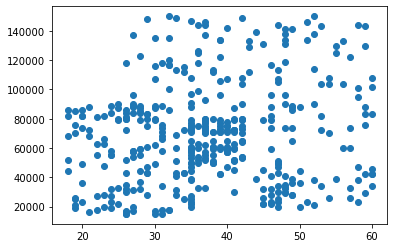

In [6]:
plt.scatter(new_data['Age'], new_data['EstimatedSalary'])
plt.show()

In [28]:
km = KMeans(n_clusters = 3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
y_predicted = km.fit_predict(new_data[['Age','EstimatedSalary']])
y_predicted  #it returns the each data point into corresponding cluster...

array([1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1,
       2, 1, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2,
       2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1,
       1, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       2, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2,
       2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1,

In [30]:
new_data['Cluster group'] = y_predicted
new_data

<ipython-input-30-b5629cce05fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Cluster group'] = y_predicted


,Gender,Age,EstimatedSalary,Cluster group
0,Male,19,19000,1
1,Male,35,20000,1
2,Female,26,43000,1
3,Female,27,57000,2
4,Male,19,76000,2
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,1


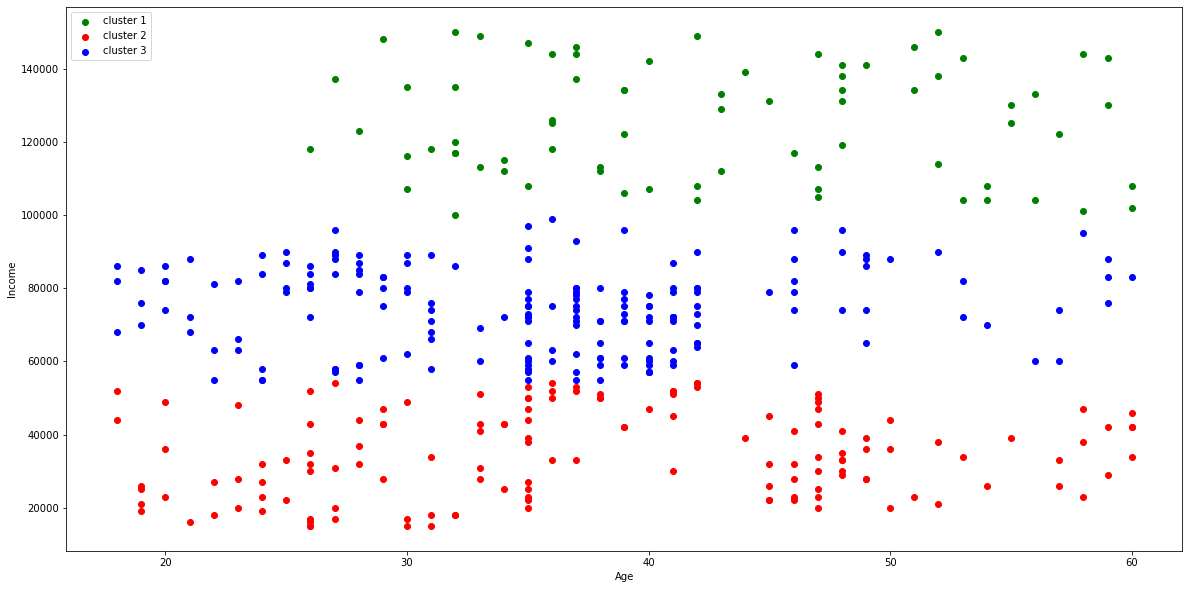

In [31]:
df1 = new_data[new_data['Cluster group'] == 0]
df2 = new_data[new_data['Cluster group'] == 1]
df3 = new_data[new_data['Cluster group'] == 2]
#df4 = new_data[new_data['Cluster group'] == 3]

plt.figure( figsize = (20,10))
plt.scatter(df1.Age, df1['EstimatedSalary'], color = 'green',  label = 'cluster 1')
plt.scatter(df2.Age, df2['EstimatedSalary'], color = 'red',  label = 'cluster 2')
plt.scatter(df3.Age, df3['EstimatedSalary'], color = 'blue',  label = 'cluster 3')
#plt.scatter(df4.Age, df4['EstimatedSalary'], color = 'yellow', label = 'cluster 4')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [32]:
# here  above x axis is 40 

In [33]:
scaler = MinMaxScaler()

In [43]:
new_data[['Age','EstimatedSalary']] = scaler.fit_transform(new_data[['Age','EstimatedSalary']])
new_data

<ipython-input-43-2f26c9e5613a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[['Age','EstimatedSalary']] = scaler.fit_transform(new_data[['Age','EstimatedSalary']])
c:\users\91939\desktop\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Gender,Age,EstimatedSalary,Cluster group
0,Male,0.023810,0.029630,1
1,Male,0.404762,0.037037,1
2,Female,0.190476,0.207407,1
3,Female,0.214286,0.311111,2
4,Male,0.023810,0.451852,2
...,...,...,...,...
395,Female,0.666667,0.192593,1
396,Male,0.785714,0.059259,1
397,Female,0.761905,0.037037,1
398,Male,0.428571,0.133333,1


In [57]:
km = KMeans(n_clusters = 4)
y_predicted = km.fit_predict(new_data[['Age','EstimatedSalary']])
y_predicted 

array([2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 3, 2,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0,
       0, 0, 2, 1, 2, 2, 0, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 3, 2, 2, 2, 0, 0, 0,
       0, 2, 3, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 1, 0, 2, 0, 2,
       0, 2, 2, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 2, 3, 1, 0, 1, 3, 1, 1, 1, 3, 1, 1, 3, 0, 3, 1, 3, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 3, 0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 3, 3, 1, 3, 3, 0, 1, 3, 3, 3, 0, 0, 3, 1, 0,
       0, 1, 0, 0, 1, 1, 3, 0, 0, 0, 0, 1, 0, 1, 3,

In [62]:
centroids = km.cluster_centers_ #returns the current centroids
centroids

array([[0.42269439, 0.41589311],
       [0.62169312, 0.79003201],
       [0.1914787 , 0.20335283],
       [0.78571429, 0.1996633 ]])

In [58]:
new_data['Cluster'] = y_predicted 
#new_data.drop('Cluster group', axis = 'columns', inplace = True)
#new_data

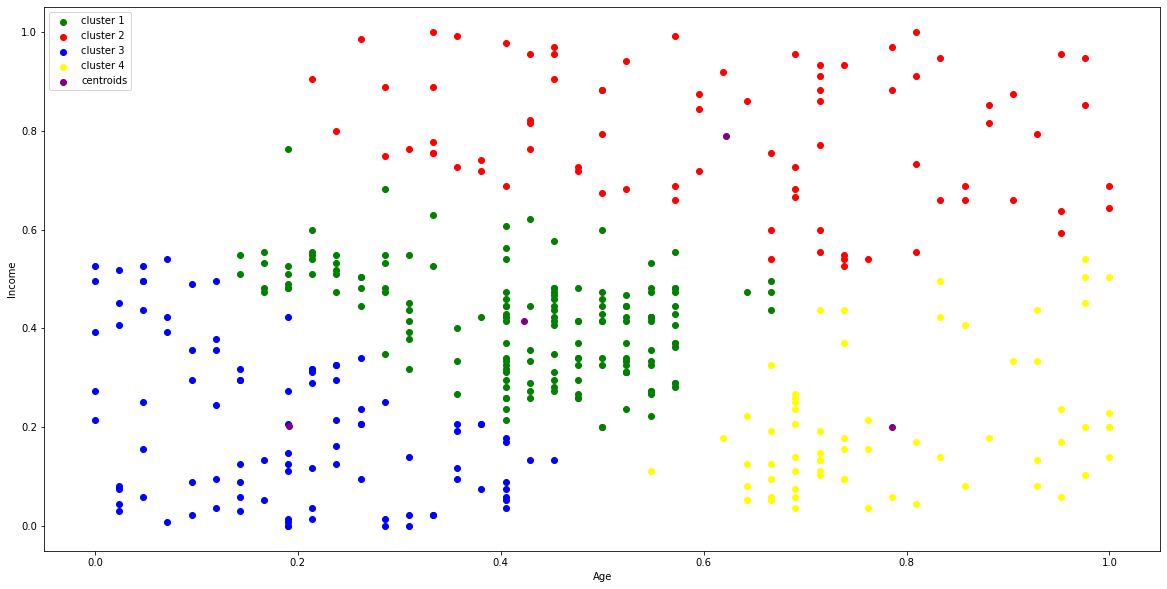

In [65]:
df1 = new_data[new_data['Cluster'] == 0]
df2 = new_data[new_data['Cluster'] == 1]
df3 = new_data[new_data['Cluster'] == 2]
df4 = new_data[new_data['Cluster'] == 3]
#df5 = new_data[new_data['Cluster'] == 4]

plt.figure( figsize = (20,10))
plt.scatter(df1.Age, df1['EstimatedSalary'], color = 'green',  label = 'cluster 1')
plt.scatter(df2.Age, df2['EstimatedSalary'], color = 'red',  label = 'cluster 2')
plt.scatter(df3.Age, df3['EstimatedSalary'], color = 'blue',  label = 'cluster 3')
plt.scatter(df4.Age, df4['EstimatedSalary'], color = 'yellow', label = 'cluster 4')
#plt.scatter(df5.Age, df5['EstimatedSalary'], color = 'violet', label = 'cluster 5')
plt.scatter(centroids[:,0], centroids[:,1], color = 'purple', label = 'centroids' )

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

# ELBOW plot

In [66]:
k_rng  = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(new_data[['Age', 'EstimatedSalary']])
    sse.append(km.inertia_)  # km.inertia_ = gives the sum of squared errors. 

In [67]:
sse

[50.30909586517735,
 31.61634534716606,
 20.353941650782783,
 15.472670221373017,
 11.405365006904653,
 8.409340601376858,
 7.102219686485428,
 6.267231269879798,
 5.590743798460538]

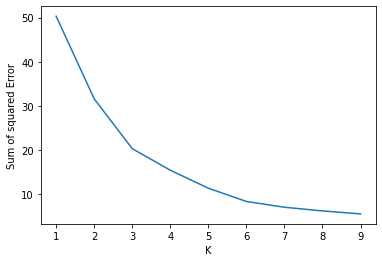

In [69]:
plt.xlabel('K')
plt.ylabel('Sum of squared Error')
plt.plot(k_rng, sse)
plt.show()